<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>

# Algorithmic Trading using Deep Autoencoder based Statistical Arbitrage

This lab was developed by Onur Yilmaz, Ph.D.

## 1. Environment Verification

Before we begin, let's verify WebSockets are working on your system. To do this, execute the cell block below by giving it focus (clicking on it with your mouse), and hitting Shift-Enter, or pressing the play button in the toolbar above. If all goes well, you should see some output returned below the grey cell.

In [1]:
print("The answer should be three: " + str(1+2))

The answer should be three: 3


Let's execute the cell below to display information about the GPUs running on the server.

In [2]:
!nvidia-smi

Tue Oct  9 14:17:21 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.26                 Driver Version: 396.26                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:1E.0 Off |                    0 |
| N/A   55C    P0    66W / 149W |     73MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 2. Lab Overview

This lab focuses on one of the popular algorithmic trading strategies, called Statistical Arbitrage. It utilizes deep autoencoders to generate trading signals for the 30 Dow Jones stocks.

The goal of this lab is to give you a deep learning (DL) approach that can be potentially beneficial to the complex investment strategies in algorithmic trading. This lab is a complete algorithmic trading strategy that generates a profit and loss curve (P&L). It shows how deep autoencoder based deep neural networks can be applied to generate trading signals (long or short). The code provided in this lab can be used for a given portfolio.

DL has been disrupting many applications including computer vision, natural language processing, and there has been a flurry of research and development activities in different verticals of the industry such as healthcare and finance to exploit this new technology for the area specific use cases. DL based investment strategies are also in the center of research and development activities in the algorithmic trading. 

In this lab, it is assumed that you are familiar with algorithmic trading, deep neural networks, TensorFlow, Keras, and Python. For more information on deep neural networks and TensorFlow, please check the relevant labs in DLI. 

In the third section, financial terminologies (particularly in algo-trading) are given. You can skip this section and directly start working on the hands-on exercises if you have already known these terms. Detailed information on the deep autoencoders are given in the fourth section. Step by step implementation of the strategy is given in the next section. Exercises, next steps and conclusions are given at the last part of the lab.

## 3. Algorithmic Trading

Algorithmic trading (algo-trading) is the process of using computer programs designed to follow a strategy for placing a trade in order to generate profits at a speed and frequency that is impossible for a human trader. The algorithms in algo-trading use complex mathematical models, formulas, and statistics to develop new trading strategies. The algorithms are based on timing, price, quantity, and a variety of mathematical models. Apart from profit opportunities for the trader, algo-trading makes markets more liquid and makes trading more systematic by ruling out emotional human impacts on financial markets and trading activities. 

### Terminology:

Terminologies are directly taken from Investopedia.com [[1](http://www.investopedia.com/)]

**Stock:** A stock is a type of security that signifies ownership in a corporation and represents a claim on part of the corporation's assets and earnings.It is delivered in the units of shares.

**Share:** Shares are units of ownership interest in a corporation or financial asset.

**Portfolio:** A portfolio is a grouping of financial assets such as stocks, bonds and cash equivalents.

**Long Position (Long):** A long (or long position) is the buying of a security such as a stock, commodity or currency with the expectation that the asset will rise in value. Trader normally has no plan to sell the security in the near future. A key component of long position investment is the ownership of the stock or bond. 
    
**Short Position (Short):** A short (or short position), is a directional trading or investment strategy where the investor sells shares of borrowed stock in the open market. The expectation of the investor is that the price of the stock will decrease over time, at which point the investor will purchase the shares in the open market and return the shares to the broker which he borrowed them from.

**Return:** A return is the gain or loss of a security in a particular period. The return consists of the income and the capital gains relative on an investment, and it is usually quoted as a percentage. The general rule is that the more risk you take, the greater the potential for higher returns and losses.

**Risk:** Risk involves the chance an investment's actual return will differ from the expected return. Risk includes the possibility of losing some or all of the original investment. Different versions of risk are usually measured by calculating the standard deviation of the historical returns or average returns of a specific investment.

**Sharpe Ratio:** The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. It was developed by Nobel laureate William F. Sharpe. It is widely used to measure the performance of the strategy.

**Mean Reversion:** Mean reversion is the theory suggesting that prices and returns eventually move back toward the mean or average. This mean or average can be the historical average of the price or return, or another relevant average such as the growth in the economy or the average return of an industry. 

A reversion involves the return of any condition back to a previous state. In cases of mean reversion, the thought is that any price that strays far from the long-term norm will again return, reverting to its understood state. The theory is focused on the reversion of only relatively extreme changes, as normal growth or other fluctuations are an expected part of the paradigm.

This theory has led to many investing strategies involving the purchase or sale of stocks or other securities whose recent performances have greatly differed from their historical averages. However, a change in returns could be a sign that the company no longer has the same prospects it once did, in which case it is less likely that mean reversion will occur.

**Pairs Trading:** Pairs trading is a market-neutral trading strategy that matches a long position with a short position in a pair of highly correlated instruments such as two stocks. A pairs trading strategy is centered on the concept of mean reversion. It waits for weakness in the correlation, and then go long on the under-performer while simultaneously going short on the over-performer, closing the positions as the relationship returns to its statistical norm. The strategy’s profit is derived from the difference in price change (spread) between the two instruments, rather than from the direction in which each moves. Therefore, a profit can be realized if the long position goes up more than the short, or the short position goes down more than the long.

**Statistical Arbitrage (Stat-arb):** At a basic level, arbitrage is the process of simultaneously buying and selling the same (or equivalent) securities on different markets to take advantage of price differences and make a profit. The price differences can be the result of market inefficiencies, pricing mismatches and even currency exchange rates.

In stat-arb, a profit situation arises from pricing inefficiencies between securities. Investors identify the arbitrage situation through mathematical modeling techniques. It depends heavily on the ability of market prices to return to a historical or predicted normal. A spread is formed in stat-arb to make decisions to buy or sell it according to mathematical models and statistical analysis. It is also described as complex short-term mean-reversion strategy. Pairs trading can also fall under stat-arb.

Principal component analysis (PCA) is widely used as a mathematical model to create a representation of the market (model) based on a given basket of assets (i.e. stocks). An the spread between market model and the individual asset return is measured for an arbitrage opportunity. Whenever the spread is large and expected to revert back to its mean value in the near future, a trading decision is made. 

In this lab, the goal is to use autoencoders (non-linear) instead of PCA (linear) to create the model for stat-arb. Detailed explanation and step by step implementation are given in Section 5.

**Backtesting:** It is the process of testing a trading strategy on relevant historical data to ensure its viability before the trader risks any actual capital. A trader can simulate the trading of a strategy over an appropriate period of time and analyze the results for the levels of profitability and risk.

### A Simple Mean-Reversion Based Algorithmic Trading Example:

We will demonstrate a simple mean-reversion based trading strategy using Apple Inc.'s stock price (AAPL). All of the mean-reversion based strategies rely on a mean-reverting signal to generate a trading signal. Obtaining a mean-reverting signal is not a trivial task. Some of the simple trend following strategies utilize the ratio of short term moving averages (STMA) and long term moving averages (LTMA) to generate a mean-reverting signal while pairs trading utilizes correlation between two correlated stock returns. On the other hand, complex algo-trading strategies like stat-arb uses complex models to obtain a mean-reverting signal for each stock in the portfolio.

In the following cell, we implemented a simple mean averages based strategy. Price, STMA, LTMA, mean-reverting signal, opened positions, and P&L are plotted for your review.

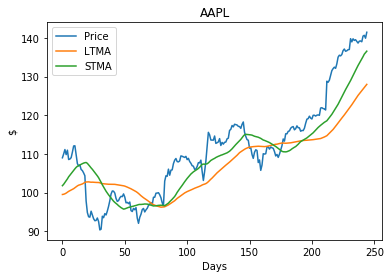

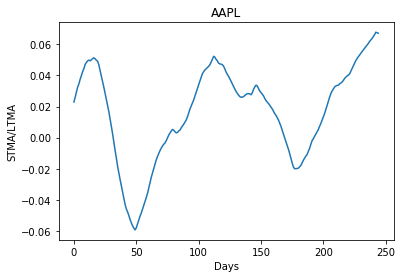

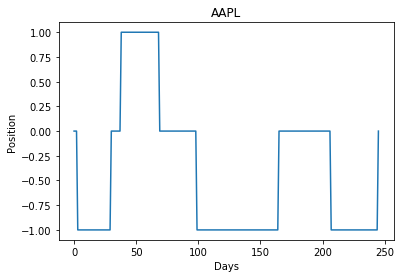

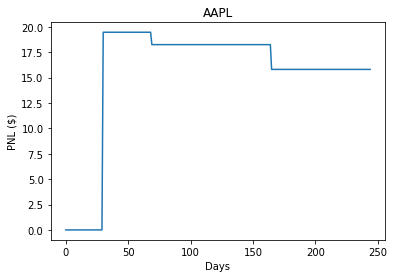

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Reading the price data from .xlsx file
xl_aapl = pd.ExcelFile('/dli/tasks/task3/task/data/AAPL.xlsx')
dfP_aapl = xl_aapl.parse('Sheet1')
P_aapl = dfP_aapl.fillna(method="backfill")
P_aapl = np.array(P_aapl.drop('Date', axis=1))

# Defining hyperparameters:  window size of long and short term moving average (W_STMA, W_LTMA), and threshold to open (T1) and close (T2) position
W_LTMA = 60
W_STMA = 30
T1_aaple = 0.03
T2_aaple = 0.01

[R_aaple, C_aaple] = P_aapl.shape
dm = np.zeros(shape=(R_aaple-W_LTMA,3), dtype=float)
mr = np.zeros(shape=(R_aaple-W_LTMA,1), dtype=float)
pos_aaple = np.zeros(shape=(R_aaple-W_LTMA+1,1), dtype=int)
p_apple_snap = 0.0
PNL_apple = np.zeros(shape=(R_aaple-W_LTMA,1), dtype=float)

idx = 0
for i in range(W_LTMA, R_aaple):
    ps = P_aapl[i-W_LTMA:i]
    pf = P_aapl[i-W_STMA:i]
    ms = np.mean(ps)
    mf = np.mean(pf)
    
    dm[idx,0] = P_aapl[i]
    dm[idx,1] = ms
    dm[idx,2] = mf
    mr[idx] = (mf/ms) - 1
    
    if pos_aaple[idx-1] == 0 and mr[idx] > T1_aaple:
        # If the stock has no position and the spread of the ratio above the threshold T1
        # Short position is opened because we expect the ratio will go down to get back its normal behaviour (mean)
        pos_aaple[idx] = -1
        p_apple_snap = P_aapl[i]
    elif pos_aaple[idx-1] == 0 and mr[idx] < -T1_aaple:
        # If the stock has no position and the spread of the error signal below the threshold -T1
        # Long position is opened because we expect the stock will go up to get back its normal behaviour (mean)
        pos_aaple[idx] = 1
        p_apple_snap = P_aapl[i]
    elif pos_aaple[idx-1] == -1 and mr[idx] < T2_aaple:
        # If the stock is in short position and the spread is below threshold T2, 
        # that means it almost gets back to its normal behaviour and we close the position to generate profit
        pos_aaple[idx] = 0
        PNL_apple[idx] = -(P_aapl[i] - p_apple_snap)
    elif pos_aaple[idx-1] == 1 and mr[idx] > -T2_aaple:
        # If the stock is in long position and the spread is above threshold -T2, 
        # that means it almost gets back to its normal behaviour and we close the position to generate profit
        pos_aaple[idx] = 0
        PNL_apple[idx] = P_aapl[i] - p_apple_snap
    else:
        # Otherwise, no position is opened
        pos_aaple[idx] = pos_aaple[idx-1]
    
    idx += 1
    
plt_p, = plt.plot(dm[:,0], label='Price')
plt_ltma, = plt.plot(dm[:,1], label='LTMA')
plt_stma, = plt.plot(dm[:,2], label='STMA')
plt.legend(handles=[plt_p, plt_ltma, plt_stma])

plt.title('AAPL')
plt.ylabel('$')
plt.xlabel('Days')
plt.show()
    
plt.plot(mr)
plt.title('AAPL')
plt.ylabel('STMA/LTMA')
plt.xlabel('Days')
plt.show()

plt.plot(pos_aaple)
plt.title('AAPL')
plt.ylabel('Position')
plt.xlabel('Days')
plt.show()

plt.plot(np.cumsum(PNL_apple))
plt.title('AAPL')
plt.ylabel('PNL ($)')
plt.xlabel('Days')
plt.show()

The second figure above plots a signal which is the ratio of STMA and LTMA. This signal is reverting around mean zero. If the signal is below -T1, it longs the stock with the expectation of reverting back to normal. Similarly, if the signal is above T1, it shorts the stock. Third and the fourth figure above plot the opened positions and the P&L, respectively.

Performance of the strategy heavily depend on the hyperparameters such as window size of long and short term moving average (W_STMA, W_LTMA), and threshold to open (T1) and close (T2) position.

Let's set the short term average window as W_STMA = 20 and re-run the the cell.

Was the P&L improved?

As you noticed, P&L is improved. Although the algorithm is relatively simple, hyperparameter search is a non-trivial task.

Moving average based mean-reverting algorithms were the workhorse of many algo-trading strategies in 1990s. But, they perform poorly in many situations like up or down trend in the price. That is why strategies like stat-arb use complex mathematical models to generate more reliable mean-reverting signals for trading.

If you are interested in the technical details of these methods, we highly recommend you to check these references [[2](http://www.tandfonline.com/doi/abs/10.1080/14697680903124632), [3](https://www.elsevier.com/books/a-primer-for-financial-engineering/akansu/978-0-12-801561-2)]

## 4. What is an Autoencoder?

<img src="autoencoder.jpg" width="700" height="900">

                               Figure 1: (a) Autoencoder (b) Deep Autoencoder with 5 Layers
                                            
An autoencoder is an artificial neural network that tries to reconstruct its input. It is used for unsupervised learning. The goal of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction. Encoder generates latent features and decoder tries to reconstruct the input using latent features. Fig. 1 depicts (a) an autoencoder and (b) a deep autoencoder. Recently, the autoencoder concept has become more widely used for learning generative models of data. 

Architecturally, the simplest form of an autoencoder is a feedforward, non-recurrent neural network very similar to the multilayer perceptron (MLP), having an input layer, an output layer, and one or more hidden layers connecting them, but with the output layer having the same number of nodes as the input layer for the purpose of reconstructing its own inputs [[4](https://en.wikipedia.org/wiki/Autoencoder)].

Principal component analysis (PCA) is a special autoencoder with linear activations. It has been the pillars of many applications in various industries including finance. PCA is also widely used in mathematical modeling for stat-arb. In this lab, we will explore the performance of deep autoencoders with non-linear activations in stat-arb.

The code in the following cell draws an autoencoder with 5 layers. You can set different values to "N_viz" variable to change the size of the input and output.

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 30)                480       
Total params: 1,177
Trainable params: 1,177
Non-trainable params: 0
_________________________________________________________________


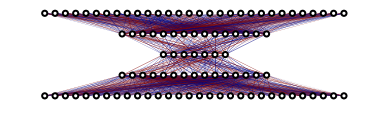

In [4]:
from keras.models import Sequential, Model
from keras.layers import Dense
import nnViz
import matplotlib.pyplot as plt

N_viz = 30
hParams_viz = {}
hParams_viz['inputOutputDimensionality'] = N_viz
hParams_viz['hl1'] = np.int32(N_viz / 2)
hParams_viz['hl2'] = np.int32(hParams_viz['hl1'] / 2)

model_viz = Sequential()
model_viz.add( Dense( hParams_viz['hl1'], input_dim = hParams_viz['inputOutputDimensionality'], activation = 'linear'))
model_viz.add( Dense( hParams_viz['hl2'], activation = 'sigmoid'))
model_viz.add( Dense( hParams_viz['hl1'], activation = 'sigmoid'))
model_viz.add( Dense( hParams_viz['inputOutputDimensionality'], activation = 'linear',))
model_viz.summary()
    
plt.figure()
nnViz.visualize_model(model_viz)

## 5. Backtesting the Deep Autoencoder based Stat-Arb Strategy

In this section, we demonstrate the backtesting of deep autoencoder based statistical arbitrage strategy using Keras with TensorFlow backend. Our portfolio is comprised of 30 Dow Jones stocks. Historical adjusted close price of stocks is downloaded from [Yahoo Finance](https://finance.yahoo.com/) and split in time to create training and testing set. In algorithmic trading, backtesting with training set is usually performed for hyperparameter search.

First, we import several widely used modules such as NumPy for numerical calculations, pandas for data management, matplotlib for visualizations, and Keras with TensorFlow backend for building and training deep neural networks.

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential, Model
from keras.layers import Dense
from keras import metrics
from keras import initializers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

### Functions:

Before we read the data and build the model, we defined the used functions in the lab. 

The "getReturn" function in the following cell calculates the log-return of assets. Typically, a price data matrix that includes price of single asset or multiple assets in different columns are passed as an input. 

In [6]:
def getReturn(data):
    [R, C] = data.shape
    dataND = data[1:R]   
    dataTD = data[0:R-1]
    rts = np.log(np.divide(dataND, dataTD))
    return rts

We standardize the log-returns (Z-score normalization) using the following function.  are normalized to zero mean and unit variance. One of the most commonly used technique, which is calculated using the arithmetic mean and standard deviation of the given data. Standardization is widely used in machine learning when the scale of the each feature in the set is different.

In [7]:
def normalizeReturn(data):
    data = np.divide((data - np.mean(data, axis=0)), np.std(data, axis=0)) 
    return data

Next up "getTrainedAutoencoderModel" function returns a trained model for the given model parameters and the training data. 

In [8]:
def getTrainedAutoencoderModel(hParams, trainData):
    # 5 layers of deep autoencoder is defined
    model = Sequential()
    model.add( Dense( hParams['hl1'], input_dim = hParams['inputOutputDimensionality'], activation = 'linear'))
    model.add( Dense( hParams['hl2'], activation = 'sigmoid'))
    model.add( Dense( hParams['hl1'], activation = 'sigmoid'))
    model.add( Dense( hParams['inputOutputDimensionality'], activation = 'linear',))
    
    model.compile(optimizer = 'adam', loss = 'mse')
    early_stopping = EarlyStopping( monitor = 'val_loss', patience = 10)
    checkpointer = ModelCheckpoint( filepath = 'synthetic_weights.hdf5', verbose=1, save_best_only = True)
    
    # Model is trained
    model.fit( trainData,
           trainData,
           batch_size = hParams['batchSize'], 
           epochs = hParams['epochs'],
           shuffle = True,
           #callbacks = [early_stopping, checkpointer],
           validation_data = (trainData, trainData),
           verbose = 0 )
    
    return model

Based on the current position, calculated spread, and the thresholds, trading signals will be generated.

In [9]:
def genTradingSignals(pos, spread, Ts, Ss, Ps, N):
    # Based on the spread, signal generation is similar to pairs trading 
    newPos = np.zeros(shape=(1, N), dtype=int) # New position for each stock will be stored in this vector
    signal = np.zeros(shape=(1, N), dtype=int) # Generated signal to get to new position will be stored in this vector
    totalOpenedPos = 0
    
    for stock in range(0, N):
        if pos[stock] == Ps['NO_POSITION'] and spread[stock] > Ts['T1']:
            # If the stock has no position and the spread of the error signal above the threshold T1
            # Short position is opened because we expect the stock will go down to get back its normal behaviour (mean)
            signal[0, stock] = Ss['SHORT_SELL']
            newPos[0, stock] = Ps['SHORT']
        elif pos[stock] == Ps['NO_POSITION'] and spread[stock] < -Ts['T1']:
            # If the stock has no position and the spread of the error signal below the threshold -T1
            # Long position is opened because we expect the stock will go up to get back its normal behaviour (mean)
            signal[0, stock] = Ss['BUY']
            newPos[0, stock] = Ps['LONG']
        elif pos[stock] == Ps['SHORT'] and spread[stock] < Ts['T2']:
            # If the stock is in short position and the spread is below threshold T2, 
            # that means it almost gets back to its normal behaviour and we close the position to generate profit
            signal[0, stock] = Ss['BUY_TO_COVER']
            newPos[0, stock] = Ps['NO_POSITION']
        elif pos[stock] == Ps['LONG'] and spread[stock] > -Ts['T2']:
            # If the stock is in long position and the spread is above threshold -T2, 
            # that means it almost gets back to its normal behaviour and we close the position to generate profit
            signal[0, stock] = Ss['SELL']
            newPos[0, stock] = Ps['NO_POSITION']
        else:
            # Otherwise, no position is opened
            newPos[0, stock] = pos[stock]
          
        if newPos[0, stock] !=  Ps['NO_POSITION']:
            totalOpenedPos += 1
            
    return (newPos, signal, totalOpenedPos)

Once the trading signals are generated, they are sent to order execution unit. In this function, the orders will be executed, and profit and loss will be calculated.

In [10]:
# This function executes the new orders, calculates the cost and P&L
def executeOrders(signal, numOfShares, currentPrice, lastPriceSnap, tParam, Ss, N):
    #P&L of each stock is stored in this vector
    PNLAsset = np.zeros(shape=(1, N), dtype=float)
    # This variables keeps the P&L of the portfolio
    PNLTotal = 0.0
    
    for stock in range(0, N):
        if signal[0, stock] == Ss['SHORT_SELL'] or signal[0, stock] == Ss['BUY']:
            # New position will be opened
            # Converting the investment amount to number of shares
            nOfS = round(tParam['investPerAsset'] / currentPrice[0, stock])
            # # Calculating the cost
            cost = nOfS * tParam['tradingCostPerShare']
            # Since new position is opening, there is no profit or loss, only the cost
            PNLAsset[0, stock] = -cost 
            PNLTotal += PNLAsset[0, stock]
            # Taking the snapshot of the purchase price
            lastPriceSnap[0, stock] = currentPrice[0, stock]
            # Storing the number of purchased shares
            if signal[0, stock] == Ss['SHORT_SELL']:
                numOfShares[0, stock] = -nOfS
            else:
                numOfShares[0, stock] = nOfS
        elif signal[0, stock] == Ss['SELL'] or signal[0, stock] == Ss['BUY_TO_COVER']:
            # Position will be closed
            # Calculating the profit or loss
            priceDiff = currentPrice[0, stock] - lastPriceSnap[0, stock]
            # Calculating the cost
            cost = numOfShares[0, stock] * tParam['tradingCostPerShare']
            # Updating the P&L for the stock
            PNLAsset[0, stock] = (priceDiff * numOfShares[0, stock]) - cost 
            # Updating the P&L of the portfolio
            PNLTotal += PNLAsset[0, stock]
            # Setting the number of stock to zero
            numOfShares[0, stock] = 0
            
    return (PNLAsset, lastPriceSnap, numOfShares, PNLTotal)

### Backtesting the Strategy

Historical adjusted prices of 30 Dow Jones stocks are imported in the following cell. 

In [11]:
# Reading the price data from .xlsx file
xl = pd.ExcelFile('/dli/tasks/task3/task/data/DJI-AdjPrice-Train.xlsx')
dfP = xl.parse('Sheet1')
P = dfP.fillna(method="backfill")

<img src="backtesting.jpg" width="500" height="500">

                                        Figure 2: Sliding window in backtesting

**Backtesting is comprised of 6 main steps;**

Assuming the start time T=t-1

1) Get the subset of the price data (P$_s$) for a given data window size as depicted in Fig. 2.

2) Calculate the log-returns (R$_s$) of P$_s$

3) Train a deep autoencoder using the R$_s$

4) Perform an inference using the last row of R$_s$ and append the reconstruction errors to the matrix M.

5) After pre-defined number of steps (error signal window), calculate the cumulative sum of reconstruction errors (M) for every stock, normalize and append the results to matrix S. Then, analyze the spread of error signal for every stock and generate trading signals.

6) Slide the data window one sample down in time (t=t+1), and go back to step one.

Main steps of the backtesting is implemented in the following cell. It might take 3-5 minutes to complete the backtesting.

In [12]:
# The strategy will be run for a given subset of data 
# We will be sliding over the data with a sample after each trading cycle
[R, C] = P.shape
N = C - 1

# Integer values to represent trade signals
Ss = {}
Ss['SELL'] = -1 # Sell the all the shares to close the position
Ss['SHORT_SELL'] = -2 # Enter a short position
Ss['BUY'] = 1 # Enter a long position
Ss['BUY_TO_COVER'] = 2 # Buy shares to close the short position

# Integer values to represent the current position of the assets
Ps = {}
Ps['NO_POSITION'] = 0
Ps['SHORT'] = -1
Ps['LONG'] = 1

# Parameters of deep autoencoder. 
# In this case, we only use 5-layer autoencoder but you can try different models
hParams = {}
hParams['inputOutputDimensionality'] = N
hParams['hl1'] = np.int32(N / 2)
hParams['hl2'] = np.int32(hParams['hl1'] / 2)
hParams['batchSize'] = 256
hParams['epochs'] = 400

# Window size to train the model
TrainingSetSize = 200 # 200
# Window size to calculate the spread of the error signal
ErrorSignalWindow = 50 # 50

# These are the threshold values that will be used in stat-arb strategy.
# The first threshold, T1, is used to open a position.
# The second threshold, T2, is used to close a position
Ts = {}
Ts['T1'] = 1.2 # Threshold for entering position
Ts['T2'] = 0.6 # Threshold for exiting the position

# Matrices are defined to store errors and spreads
errors = np.empty((0,N))
spread = np.empty((0,N))
# Matrices to store current position, num of shares bought, PNL per asset, PNL of portfolio
pos = np.zeros(shape=(1,N), dtype=int)
numOfShares = np.zeros(shape=(1,N), dtype=int)
lastPriceSnap = np.zeros(shape=(1,N), dtype=float)
PNLPerAsset = np.zeros(shape=(1,N), dtype=float)
PNLPortfolio = np.zeros(shape=(1, 1), dtype=float)
PNLPortfolioTotal = 0.0

# Parameters for the algorithmic trading strategy
tParam ={}
# Amount of money will be invested when entered a position.
# If you would like to invest a different amount, please update the number
tParam['investPerAsset'] = 5000 
# Trading cost ($) per share. You can update the number based on your cost 
tParam['tradingCostPerShare'] = 0.005 

idx = 0
# Historical prices will be analyzed in a sliding window fashion
# In each iteration, a subset of the data will be taken and analyzed 
for i in range(TrainingSetSize, R):
    # Takes the subset of the price data for the row indeces between (i-TrainingSetSize) and i
    pts = P[(i-TrainingSetSize):i].drop('Date', axis=1) 
    pts = np.array(pts)
    rts = getReturn(pts) # Log-returns are calculated
    rts = normalizeReturn(rts) # Log-returns are normalized
    lastReturn = rts[rts.shape[0]-1:rts.shape[0]] # Last row of log-returns is stored to be used later
        
    print("Training %d", idx)
    # Deep autoencoder is trained using the log-returns
    model = getTrainedAutoencoderModel(hParams, rts)
    
    # Last row of the log-returns is forward passed to measure its reconstruction error.
    # And, these error values are stored in a matrix to analyze it
    # This error will give us information about how the individual stock returns are deviating from the normal
    # In other words, it is checking if there is anything anomalous in the stock.
    # If there is an anomalous behavior in the stock, we will generate a position based on the expection of 
    # going back to normal
    predReturn = model.predict(lastReturn)
    err = np.subtract(lastReturn, predReturn)  
    errors = np.vstack((errors, err))
       
    idx += 1
    # After a certain number of iteration, the error signal is analzed to generate trade signals
    # Again, sliding window approach is also applied 
    if idx > ErrorSignalWindow:
        ce = np.shape(errors)[0]
        # Get the last rows of the error signal for a given window size in "ErrorSignalWindow" variable
        # Then, calculate the cumulative sum to see its mean reversion behavior
        errsCum = np.cumsum(errors[ce-ErrorSignalWindow:ce], axis=0)
        
        cec = np.shape(errsCum)[0]
        # Cumulative summed error signal is z-scored to understand the spread in normalized form
        errsNorm = np.divide((errsCum[len(errsCum)-1] - np.mean(errsCum)), np.std(errsCum))  
        spread = np.vstack((spread, errsNorm))
        
        # If the spread is below or above a certain threshold, trading signal is generated
        newPos, signal, totalOpenedPos = genTradingSignals(pos[len(pos)-1], spread[len(spread)-1], Ts, Ss, Ps, N) 
        # After the new positions are calculated, they are executed and P&L info is returned
        PNLAsset, lastPrice, nOfShares, PNLTotal = executeOrders(signal, 
                                                       numOfShares[len(numOfShares)-1:len(numOfShares)], 
                                                       pts[len(pts)-1:len(pts)], 
                                                       lastPriceSnap[len(lastPriceSnap)-1:len(lastPriceSnap)], 
                                                       tParam, 
                                                       Ss,
                                                       N)
        
        # State (current position, number of shares, P&L, etc) of the strategy is stored 
        pos = np.vstack((pos, newPos))
        lastPriceSnap = lastPrice
        numOfShares = np.vstack((numOfShares, nOfShares))
        PNLPerAsset = np.vstack((PNLPerAsset, PNLAsset))
        PNLPortfolio = np.vstack((PNLPortfolio, PNLTotal))
        PNLPortfolioTotal += PNLTotal
        TotalInvestedEquity = totalOpenedPos * tParam['investPerAsset']
        print("Invested Equity: %s, PNL Last Trade: %s, PNL Portfolio Total: %s" % (TotalInvestedEquity, PNLTotal, PNLPortfolioTotal))

Training %d 0
Training %d 1
Training %d 2
Training %d 3
Training %d 4
Training %d 5
Training %d 6
Training %d 7
Training %d 8
Training %d 9
Training %d 10
Training %d 11
Training %d 12
Training %d 13
Training %d 14
Training %d 15
Training %d 16
Training %d 17
Training %d 18
Training %d 19
Training %d 20
Training %d 21
Training %d 22
Training %d 23
Training %d 24
Training %d 25
Training %d 26
Training %d 27
Training %d 28
Training %d 29
Training %d 30
Training %d 31
Training %d 32
Training %d 33
Training %d 34
Training %d 35
Training %d 36
Training %d 37
Training %d 38
Training %d 39
Training %d 40
Training %d 41
Training %d 42
Training %d 43
Training %d 44
Training %d 45
Training %d 46
Training %d 47
Training %d 48
Training %d 49
Training %d 50
Invested Equity: 80000, PNL Last Trade: -5.890000000000001, PNL Portfolio Total: -5.890000000000001
Training %d 51
Invested Equity: 85000, PNL Last Trade: -0.27, PNL Portfolio Total: -6.16
Training %d 52
Invested Equity: 90000, PNL Last Trade: -

### Performance Evaluations

Stat-arb uses the spread in the error signal to generate a trade signal for an asset. It utilizes the mean-reversion feature of the error signal. If the error is below a threshold, it longs the stock with the expectation of reverting back to normal. Similarly, if the error is above a threshold, it shorts the stock. 

Performance of the strategy heavily depends on the hyperparameters. Such an algorithmic trading system usually spends significant amount of time on hyperparameter search by creating hundreds to thousands P&Ls and picks the parameters that works best for trading next minute, hour, day, etc. Multi GPU or multi node high performance systems are used for extensive hyperparameter searches. Here is the list of the hyperparameters;

1) TrainingSetSize: Window size that defines how many samples we use from history for training our model

2) ErrorSignalWindow: Window size that defines how many samples we use from error history to analyze the spread

3) T1: The threshold that determines when to enter a position. If the spread in the error is above T1 or below -T1, new position is opened if there is no position opened before.

4) T2: The threshold that determines when to close a position. If the spread in the error is above T2 or below -T2, open position is closed.

5) Number of hidden layers: Number of layers in the deep autoencoder.

6) epochs: full training cycle on the training set. Once every sample in the set is seen, you start again for the next epoch.

We perform a backtesting for each hyperparameter combinations. There are well known methods for hyperparameter search like grid or random search. Once the hyperparameters that provide the best Sharpe ratio are found, they are used for a period of time on the algorithmic trading system. When that period which is another hyperparameter is completed, we start another search because market conditions change and we need to adopt the hyperparameter for the new conditions.

For this lab, we set the hyperparameters intuitively without performing any search. Let's plot the error signal and the positions for a given stock id.

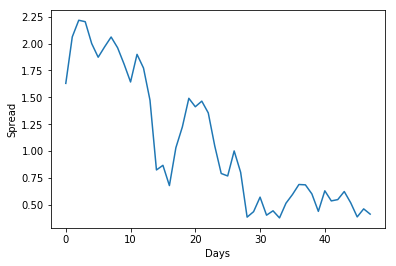

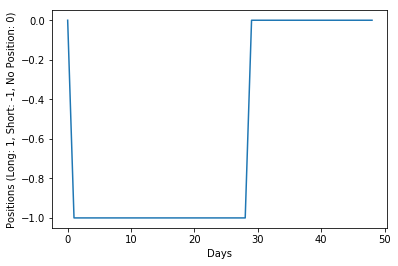

In [13]:
assetID = 19

plt.plot(spread[:,assetID])
plt.ylabel('Spread')
plt.xlabel('Days')
plt.show()

plt.plot(pos[:,assetID])
plt.ylabel('Positions (Long: 1, Short: -1, No Position: 0)')
plt.xlabel('Days')
plt.show()

You can change the assetID between 0-29 to see the error signal and positions of other stocks.

Let's plot the profit and loss curve (P&L) of the strategy and calculate the annual Sharpe ratio to evaluate the performance. 

Annual SR:  [2.10809032]


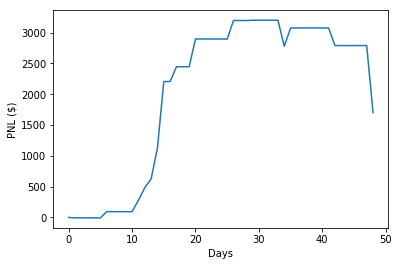

In [14]:
# Annual Sharpe ratio is calculated
SR = (np.mean(PNLPortfolio, axis=0) / np.std(PNLPortfolio, axis=0)) * math.sqrt(252)
print("Annual SR: ", SR)

cumPNLPortfolio = np.cumsum(PNLPortfolio, axis=0)
plt.plot(cumPNLPortfolio)
plt.ylabel('PNL ($)')
plt.xlabel('Days')
plt.show()

Each time you run this lab from scratch, you will likely get different Sharpe ratios even though the hyperparameters are the same. The reason behind this is that the optimization problem that is solved in training is non-convex. Because of this, the model might learn different weights (slightly different reconstruction as well) for the same training data. To control this, we suggest to add regularization into the optimization problem in the training. We leave this exercise up to you as a next step after this lab.

### Exercises:

1) Set Ts['T1'] to 1.2 in the three above cell. Then re-run everything using Kernel->Restart & Run All.

2) If you have enough time, you can try different hyperparameters to see if the Sharpe ratio is improving. Using the best performing hyperparameters, re-run everything for testing set. Change the data source to testing set by replacing the code "xl = pd.ExcelFile('Data/DJI-AdjPrice-Train.xlsx')" with "xl = pd.ExcelFile('Data/DJI-AdjPrice-Test.xlsx')" in four above cell.

## 6. What is Next?

After the lab, we recommend you doing the following options;

1) Build a HPC system with multiple GPUs for overnight or real-time hyperparameter search.

2) Develop the multi-GPU version of the code.

3) Perform hyperparameter search periodically and use the best performing hyperparameters for a period (a day, a week, etc) because market conditions are changing and your hyperparameters need to adopt to market. How long should you use the optimum hyperparameters? That is also another hyperparameter.

4) Try deeper autoencoders and see the performance.

5) Add regularization to optimization in training.

## 7. Post-Lab

Finally, don't forget to save your work from this lab before time runs out and the instance shuts down!!

You can execute the following cell block to zip the files you've been working on, and download it from the link below.

In [15]:
!tar -cvf output.zip "Algorithmic Trading using Deep Autoencoder based Statistical Arbitrage.ipynb" nnViz.py autoencoder.jpg backtesting.jpg data

Algorithmic Trading using Deep Autoencoder based Statistical Arbitrage.ipynb
nnViz.py
autoencoder.jpg
backtesting.jpg
data/
data/AAPL.xlsx
data/DJI-AdjPrice-Train.xlsx
data/DJI-AdjPrice-Test.xlsx


[Download output.zip](output.zip)

<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="Header" style="width: 400px;"/> </a>